## Convolutional Neural Networks for Image Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
single_image = x_train[0]

In [5]:
single_image.shape

(28, 28)

## Visual image

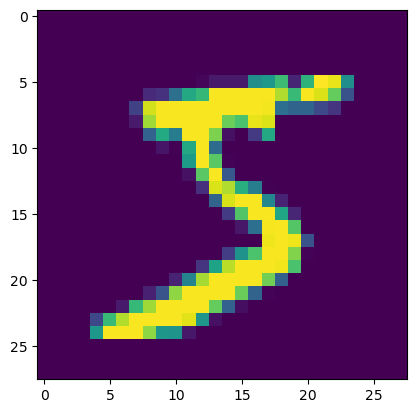

In [6]:
plt.imshow(single_image)

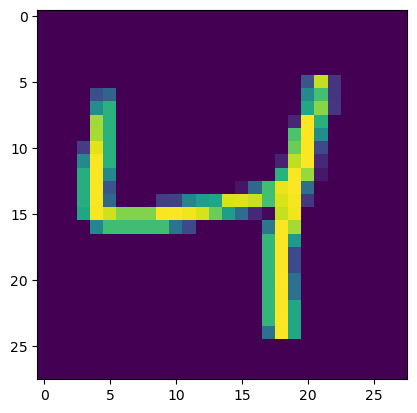

In [7]:
plt.imshow(x_train[2])

## Image Preprocessing label Y

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_samples = to_categorical(y_train)

In [12]:
y_samples.shape

(60000, 10)

In [13]:
y_samples.shape[1]

10

In [14]:
y_cat_train = to_categorical(y_train, num_classes = 10)
y_cat_test = to_categorical(y_test, num_classes = 10)

------------
-----------
## Preprocessing data X

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
x_test.shape

(10000, 28, 28)

In [17]:
x_train[0].max()

255

In [18]:
x_train = x_train/255

In [19]:
x_test= x_test/255

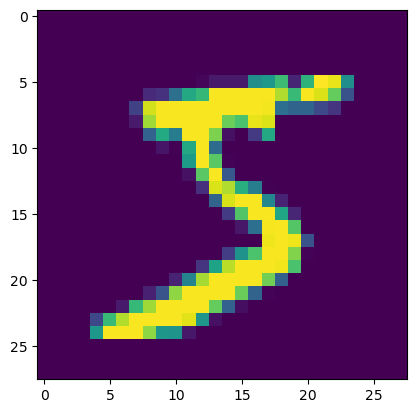

In [20]:
plt.imshow(x_train[0])

## Resshape data x

In [21]:
x_train.shape

(60000, 28, 28)

In [22]:
x_test.shape

(10000, 28, 28)

In [23]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [24]:
x_test = x_test.reshape(10000, 28, 28, 1) 

In [25]:
x_train.shape

(60000, 28, 28, 1)

In [26]:
x_test.shape

(10000, 28, 28, 1)

-----
----
## Create Model CNN

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
28*28

784

In [29]:
model = Sequential()

# Convolution layer
model.add(Conv2D(filters = 32, kernel_size =(4,4), input_shape= (28, 28, 1), activation = 'relu'))


# Pooling layer
model.add(MaxPool2D(pool_size = (2,2)))

# flatten image
model.add(Flatten())

# 128 Neorons in dense hidden layers
model.add(Dense(128, activation='relu'))
                

# last layer is the classification  
model.add(Dense(10, activation='softmax'))

# model compile
model.compile(loss= 'categorical_crossentropy', 
             optimizer = 'adam', 
             metrics = ['accuracy'])
    

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [31]:
# earlystopping
early_stop = EarlyStopping(monitor='val_loss', patience = 2)

## Train the model

In [ ]:
model.fit(x_train, y_cat_train, 
          epochs = 10, 
          validation_data = (x_test, y_cat_test), 
          callbacks = [early_stop])

Epoch 1/10
1875/1875 [==============================] - 150s 63ms/step - loss: 0.1319 - accuracy: 0.9592 - val_loss: 0.0564 - val_accuracy: 0.9824
Epoch 2/10
1875/1875 [==============================] - 115s 61ms/step - loss: 0.0457 - accuracy: 0.9861 - val_loss: 0.0407 - val_accuracy: 0.9874
Epoch 3/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0286 - accuracy: 0.9911

## Evaluate the Model

In [ ]:
model.metrics_names

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses

In [ ]:
plt.style.use(['science','notebook','grid'])

In [ ]:
losses[['loss', 'val_loss']].plot()
plt.title('Cross Entropy Loss');

In [ ]:
losses[['accuracy','val_accuracy']].plot()
plt.title('Accuracy');

In [ ]:
model.metrics_names

In [ ]:
model.evaluate(x_test, y_cat_test)

-----
----
## Evaluation Model

In [ ]:
prediction = np.argmax(model.predict(x_test), axis= -1)

In [ ]:
y_cat_test.shape

In [ ]:
y_cat_test[0]

In [ ]:
prediction[0]

In [ ]:
y_test

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, prediction))

In [ ]:
confusion_matrix(y_test, prediction)

In [ ]:
plt.figure(figsize=(12,5))
sns.heatmap(confusion_matrix(y_test, prediction), lw = 1, annot=True, cmap= 'tab10')

## Prediction new data

In [ ]:
my_number = x_test[0]

In [ ]:
plt.imshow(my_number.reshape(28,28))

In [ ]:
new_predict = np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis =-1)

In [ ]:
new_predict 